### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats

## Reading the dataset

In [2]:
df= pd.read_csv('gender_classification_v7.csv')

In [3]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1.0,0.0,1.0,1,Male
1,0,14.0,5.4,0.0,0.0,1.0,0,Female
2,0,11.8,6.3,1.0,1.0,1.0,1,Male
3,0,14.4,NaN,0.0,1.0,1.0,1,Male
4,1,13.5,5.9,0.0,0.0,0.0,0,Female


In [4]:
df.shape

(5001, 8)

In [5]:
# getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          4999 non-null   float64
 2   forehead_height_cm         4997 non-null   float64
 3   nose_wide                  4999 non-null   float64
 4   nose_long                  5000 non-null   float64
 5   lips_thin                  5000 non-null   float64
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 312.7+ KB


## Preprocessing

In [6]:
# checking for missing values
df.isnull().sum()

long_hair                    0
forehead_width_cm            2
forehead_height_cm           4
nose_wide                    2
nose_long                    1
lips_thin                    1
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [7]:
#Data Analysis

In [8]:
# statistical Measures of the dataset
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,4999.000000,4997.000000,4999.000000,5000.000000,5000.000000,5001.000000
mean,0.869626,13.181876,5.946488,0.496299,0.508000,0.494000,0.498900
std,0.336748,1.107174,0.541310,0.510334,0.499986,0.503602,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,5.000000,1.000000,4.000000,1.000000


In [9]:
df['forehead_width_cm'] = df['forehead_width_cm'].fillna(df['forehead_width_cm'].mean())
df['forehead_height_cm'] = df['forehead_height_cm'].fillna(df['forehead_height_cm'].mean())
df['nose_wide'] = df['nose_wide'].fillna(df['nose_wide'].mean())
df['nose_long'] = df['nose_long'].fillna(df['nose_long'].mean())
df['lips_thin'] = df['lips_thin'].fillna(df['lips_thin'].mean())


In [10]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

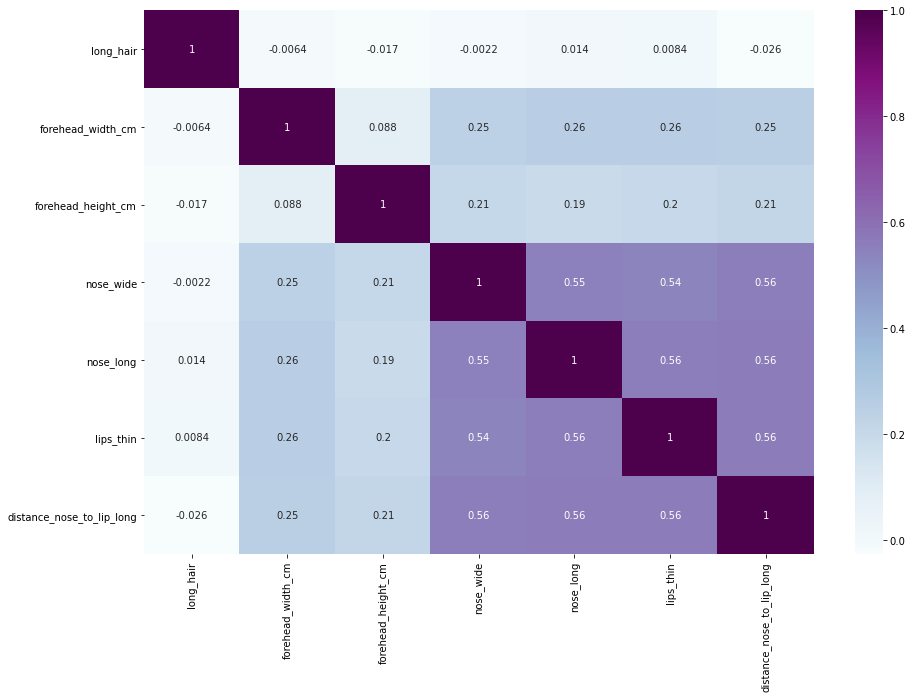

In [11]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

Text(0.5, 1.0, '')

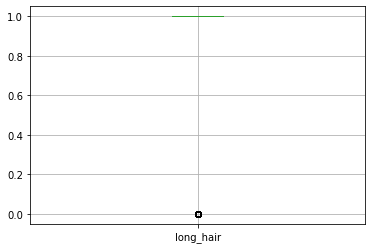

In [12]:
fig = df.boxplot(column='long_hair')
fig.set_title('')

Text(0.5, 1.0, '')

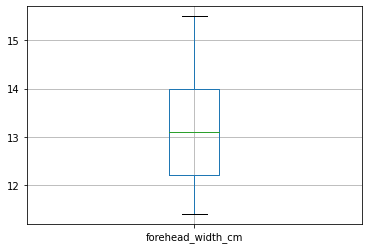

In [13]:
fig = df.boxplot(column='forehead_width_cm')
fig.set_title('')

Text(0.5, 1.0, '')

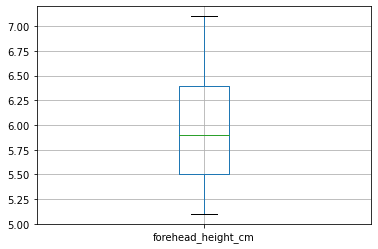

In [14]:
fig = df.boxplot(column='forehead_height_cm')
fig.set_title('')

Text(0.5, 1.0, '')

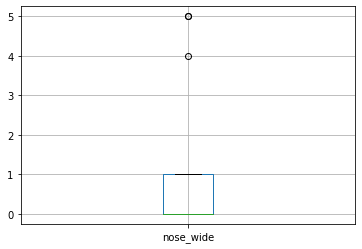

In [15]:
fig = df.boxplot(column='nose_wide')
fig.set_title('')

Text(0.5, 1.0, '')

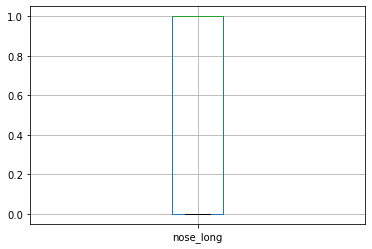

In [16]:

fig = df.boxplot(column='nose_long')
fig.set_title('')

Text(0.5, 1.0, '')

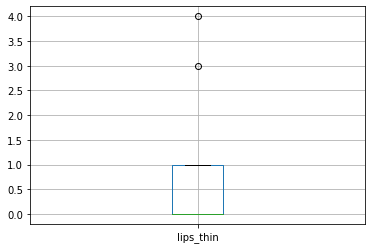

In [17]:
  

fig = df.boxplot(column='lips_thin')
fig.set_title('')

Text(0.5, 1.0, '')

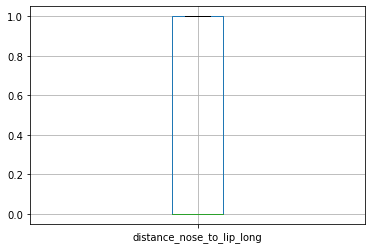

In [18]:

fig = df.boxplot(column='distance_nose_to_lip_long')
fig.set_title('')

all these columns do not follow normal distribution so we will apply this method to check outliers

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)

LETS FIND OUTLIERS 

In [19]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)
print(Q1)
print(Q3)

long_hair                    0.0
forehead_width_cm            1.8
forehead_height_cm           0.9
nose_wide                    1.0
nose_long                    1.0
lips_thin                    1.0
distance_nose_to_lip_long    1.0
dtype: float64
long_hair                     1.0
forehead_width_cm            12.2
forehead_height_cm            5.5
nose_wide                     0.0
nose_long                     0.0
lips_thin                     0.0
distance_nose_to_lip_long     0.0
Name: 0.25, dtype: float64
long_hair                     1.0
forehead_width_cm            14.0
forehead_height_cm            6.4
nose_wide                     1.0
nose_long                     1.0
lips_thin                     1.0
distance_nose_to_lip_long     1.0
Name: 0.75, dtype: float64


In [20]:
upper_boundary=Q3+1.5*IQR
print(Q3+1.5*IQR)

long_hair                     1.00
forehead_width_cm            16.70
forehead_height_cm            7.75
nose_wide                     2.50
nose_long                     2.50
lips_thin                     2.50
distance_nose_to_lip_long     2.50
dtype: float64


In [21]:
lower_boundary=Q1-1.5*IQR
print(Q1-1.5*IQR)

long_hair                    1.00
forehead_width_cm            9.50
forehead_height_cm           4.15
nose_wide                   -1.50
nose_long                   -1.50
lips_thin                   -1.50
distance_nose_to_lip_long   -1.50
dtype: float64


In [22]:
#lips thin
def total_outliers(X,Y):
    c=0
    for i in X:
        if i>Y:
            c=c+1
            
    print(c)   

In [23]:
total_outliers(df.nose_wide,2.50 )

3


In [24]:
total_outliers(df.long_hair ,1.00)

0


In [25]:
total_outliers(df.lips_thin ,2.50)

2


In [26]:
# replace the outliers with median
median = df.loc[df['nose_wide']<2.50, 'nose_wide'].median()
df.loc[df.nose_wide >2.50 , 'nose_wide'] = np.nan
df.fillna(median,inplace=True)

In [27]:
median = df.loc[df['lips_thin']<2.50, 'lips_thin'].median()
df.loc[df.lips_thin > 2.50, 'lips_thin'] = np.nan
df.fillna(median,inplace=True)

In [28]:
total_outliers(df.nose_wide,2.50 )

0


In [29]:
total_outliers(df.lips_thin ,2.50)

0


## Model

In [30]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['gender'])
Y = df['gender']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

## Feature Engineering

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [32]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [33]:
model1.fit(x_train, y_train)
y_pred=model1.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



array([[731,  26],
       [ 25, 719]], dtype=int64)

# prediction

In [34]:
model1.predict([[0,11.0,5.1,0.0,1.0,0.0,1]])

array(['Male'], dtype=object)

In [35]:
model1.predict([[1,11.8,6.1,1.0,0.0,1.0,1]])

array(['Male'], dtype=object)

In [36]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.966022651565623


### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

In [38]:
model2.fit(x_train, y_train)

KNeighborsClassifier()

In [39]:
y_pred=model2.predict(x_test)

In [40]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.966688874083944


In [43]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Evaluate the performance of the model

from sklearn.metrics import  confusion_matrix, accuracy_score,classification_report
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[736  21]
 [ 30 714]]
Accuracy: 0.966022651565623


Classification Report:
              precision    recall  f1-score   support

      Female       0.96      0.97      0.97       757
        Male       0.97      0.96      0.97       744

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501



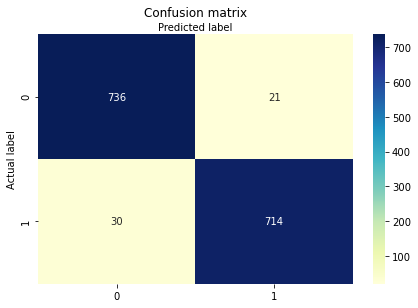

In [44]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(result), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()	
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

## DECISION TREE

In [ ]:
# DECISION TREE

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()

In [ ]:
y_pred =model3.fit(x_train, y_train)

In [ ]:
y_pred=model3.predict(x_test)
# print metric to get performance
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# Naive_Bayes classifier

## Naive_Bayes classifier

In [ ]:

from sklearn.naive_bayes import GaussianNB
model4 =  GaussianNB()
model4.fit(x_train, y_train)
y_pred=model4.predict(x_test)


In [ ]:
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))